# Quantum animation of scattering from a linear barrier in 1D

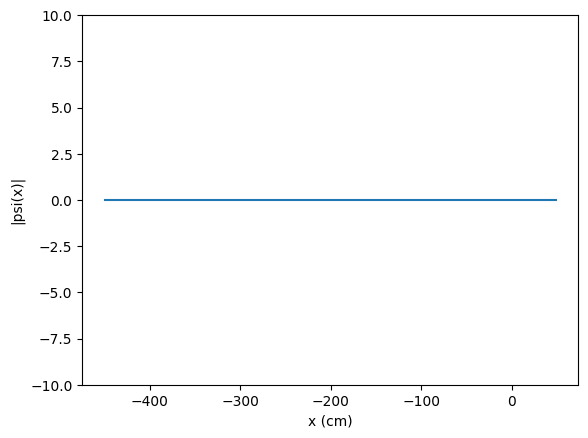

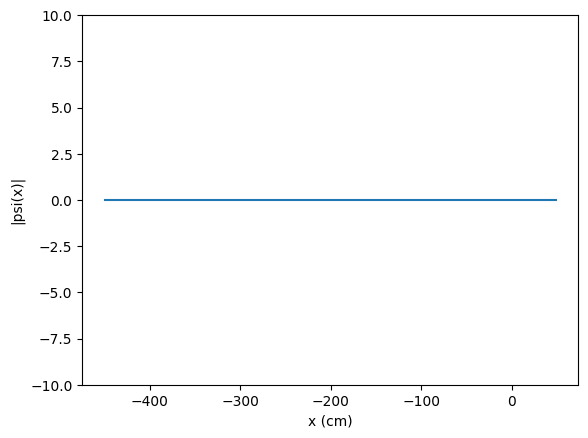

In [6]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import IPython.display as display
import time

a = 1           # slope of potential in eV/cm
b = 1           # (hbar^2 / 2 m a)^(1/3) in cm
L = 500         # 1D box size in cm
dE = 0.1        # discretisation scale for energy in eV
deltaE = 1      # energy spread in eV

def psi(x,t=-15):
    ab = a * b
    psisum = 0
    for E in np.arange(-5 * deltaE, 5 * deltaE, dE):
        z = (x/b) - (E/ab)
        psisum += scipy.special.airy(z)[0] * np.exp(-0.5 * (E / deltaE)**2) * np.exp(-1j * E * t)
    return psisum

def project():
    return np.real
    return np.absolute
    return np.imag

xarr = np.arange(-L * 0.9, L * 0.1, L/300)
tarr = np.arange(-30, 30, 0.3)

# Comment out this line after running once, saves time
#yarr = [np.array([psi(x,t) for x in xarr]) for t in tarr]

fig,ax = plt.subplots()
fig1 = ax.plot(xarr, project()(yarr[0]), marker='', linestyle='-')[0]
ax.set_ylim([-10,10])
ax.set_xlabel('x (cm)')
ax.set_ylabel('|psi(x)|')

animate = lambda i: fig1.set_data(xarr, project()(yarr[i]))

for i in range(len(yarr)):
    animate(i)
    display.clear_output(wait=True)
    display.display(fig)
    time.sleep(0.1)
    